##Import dan Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import xgboost as xgb

url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv"
df = pd.read_csv(url)

##Preprocessing

In [ ]:
df = df.dropna()

##Pemeriksaan Nilai Unik

In [ ]:
print(df['Class'].unique())

[3 2 4 1]


##Menyesuaikan Kelas Target

In [ ]:
df['Class'] = df['Class'] - 1

##Memisahkan Fitur dan Variabel Target

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

##One-Hot Encoding

In [ ]:
X = pd.get_dummies(X, drop_first=True)

##Split Dataset Into Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Scalling Data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Model Random Forest and XGBoost

In [ ]:
# Model 1: Random Forest (Bagging)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Model 2: XGBoost (Boosting)
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

##Prediksi

In [ ]:
rf_pred = rf.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

##Probabilitas untuk Kalkulasi AUC

In [ ]:
rf_prob = rf.predict_proba(X_test)
xgb_prob = xgb_model.predict_proba(X_test)

##Evaluasi Model

In [ ]:
def evaluate_model(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Adjusted for multi-class
    recall = recall_score(y_true, y_pred, average='weighted')  # Adjusted for multi-class
    f1 = f1_score(y_true, y_pred, average='weighted')  # Adjusted for multi-class
    auc = roc_auc_score(y_true, y_prob, multi_class='ovr', average='weighted')  # Multi-class AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob[:, 1], pos_label=1)  # Adjusted for ROC

    return accuracy, precision, recall, f1, auc, fpr, tpr, thresholds

##Perbandingan 2 Model

In [ ]:
# Random Forest Evaluation
rf_metrics = evaluate_model(y_test, rf_pred, rf_prob)

# XGBoost Evaluation
xgb_metrics = evaluate_model(y_test, xgb_pred, xgb_prob)

# Compare
results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Random Forest': [rf_metrics[0], rf_metrics[1], rf_metrics[2], rf_metrics[3], rf_metrics[4]],
    'XGBoost': [xgb_metrics[0], xgb_metrics[1], xgb_metrics[2], xgb_metrics[3], xgb_metrics[4]]
}

results_df = pd.DataFrame(results)
print(results_df)

      Metric  Random Forest   XGBoost
0   Accuracy       0.994000  0.996000
1  Precision       0.994027  0.996027
2     Recall       0.994000  0.996000
3   F1 Score       0.993861  0.995913
4        AUC       0.999686  0.999954


##Plot ROC Curve

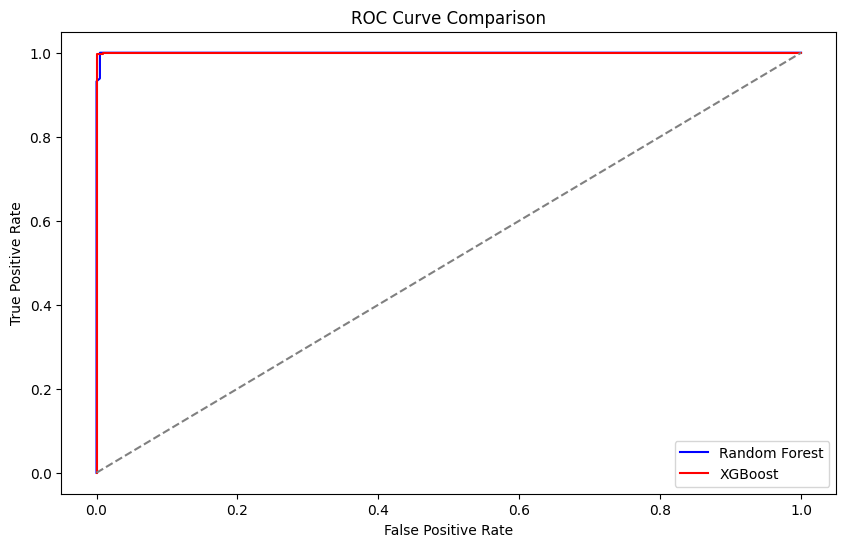

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(rf_metrics[5], rf_metrics[6], color='blue', label='Random Forest')
plt.plot(xgb_metrics[5], xgb_metrics[6], color='red', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

#**Penjelasan Matematika**

## 1. Akurasi

$$Akurasi = \frac{TP + TN}{TP + TN + FP + FN}$$

Di mana:  
- **TP**: True Positives  
- **TN**: True Negatives  
- **FP**: False Positives  
- **FN**: False Negatives  

## 2. Presisi

$$Presisi = \frac{TP}{TP + FP}$$

Ini mengukur proporsi prediksi positif yang benar dari semua prediksi positif.

## 3. Recall

$$Recall = \frac{TP}{TP + FN}$$

Ini mengukur proporsi kasus positif yang berhasil ditemukan oleh model.

## 4. F1-Score

$$F1 = 2 \times \frac{Presisi \times Recall}{Presisi + Recall}$$

Ini adalah ukuran yang menggabungkan presisi dan recall menjadi satu angka.

## 5. AUC
Ini mengukur seberapa baik model membedakan antara dua kelas, dengan area di bawah kurva ROC yang lebih tinggi menunjukkan performa model yang lebih baik.